In [1]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 40.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 37.2 MB/s eta 0:00:00


In [2]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 3.6 MB/s eta 0:00:00


In [3]:
#from huggingface_hub import hf_hub_download

In [4]:
#hf_hub_download(repo_id="lysandre/arxiv-nlp", filename="config.json")

In [5]:
import nltk

In [6]:
# Load the dataset
from datasets import load_dataset
datasets = load_dataset('squad')

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/87599 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10570 [00:00<?, ? examples/s]

Dataset squad downloaded and prepared to /root/.cache/huggingface/datasets/squad/plain_text/1.0.0/d6ec3ceb99ca480ce37cdd35555d6cb2511d223b9150cce08a837ef62ffea453. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

In [10]:
datasets

DatasetDict({
    train: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers'],
        num_rows: 87599
    })
    validation: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers'],
        num_rows: 10570
    })
})

In [11]:
!python -m spacy download en_core_web_sm

2023-05-15 01:19:47.936371: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-15 01:19:49.659092: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 59.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [12]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Data Exploration

In [13]:
import pandas as pd
import spacy
import en_core_web_sm
import nltk
from nltk import word_tokenize

In [14]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
# spacy encore websm load
nlp = en_core_web_sm.load()

In [16]:
# train data load
train_df = pd.read_csv("train.csv")


In [17]:
# test data load
test_df = pd.read_csv("validation.csv")

In [18]:
# top samples of train data
train_df.head()

,id,title,context,question,answers
0,5733be284776f41900661182,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",To whom did the Virgin Mary allegedly appear i...,"{'text': array(['Saint Bernadette Soubirous'],..."
1,5733be284776f4190066117f,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What is in front of the Notre Dame Main Building?,"{'text': array(['a copper statue of Christ'], ..."
2,5733be284776f41900661180,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",The Basilica of the Sacred heart at Notre Dame...,"{'text': array(['the Main Building'], dtype=ob..."
3,5733be284776f41900661181,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What is the Grotto at Notre Dame?,{'text': array(['a Marian place of prayer and ...
4,5733be284776f4190066117e,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What sits on top of the Main Building at Notre...,{'text': array(['a golden statue of the Virgin...


In [19]:
# sample data
train_df['answers'][1]

"{'text': array(['a copper statue of Christ'], dtype=object), 'answer_start': array([188], dtype=int32)}"

In [20]:
# column names
train_df.columns

Index(['id', 'title', 'context', 'question', 'answers'], dtype='object')

In [21]:
train_df['answers'][0]

"{'text': array(['Saint Bernadette Soubirous'], dtype=object), 'answer_start': array([515], dtype=int32)}"

In [22]:
# unique categories/ titles of data
train_df['title'].nunique()

442

In [23]:
# unique context
train_df['context'].nunique()

18891

In [ ]:
#sorted(train_df['title'].unique())

In [25]:
# combining into whole data
data = pd.concat([train_df, test_df])

In [26]:
data.answers[0]

0    {'text': array(['Saint Bernadette Soubirous'],...
0    {'text': array(['Denver Broncos', 'Denver Bron...
Name: answers, dtype: object

In [27]:
data['title'].nunique()

490

In [28]:
# calculating no of tokens
def token_length(sentence):
  tokens = []
  #doc = nlp(sentence)
  # for each in doc:
  #   tokens.append(each.text)
  tokens = word_tokenize(sentence)
  return len(tokens)

In [29]:
# calculating context length
data['context_length'] = data['context'].apply(token_length)

In [30]:
# calculating question length
data['question_length'] = data['question'].apply(token_length)

In [31]:
# calculating answer length
data['answers_length'] = data['answers'].apply(token_length)

In [32]:
# describe of data
data[['context_length', 'question_length', 'answers_length']].describe()

,context_length,question_length,answers_length
count,98169.000000,98169.000000,98169.000000
mean,138.318777,11.303599,30.175310
std,57.709973,3.725814,7.069772
min,22.000000,1.000000,26.000000
25%,102.000000,9.000000,26.000000
50%,127.000000,11.000000,27.000000
75%,164.000000,13.000000,30.000000
max,766.000000,60.000000,142.000000


array([[<Axes: title={'center': 'context_length'}>,
        <Axes: title={'center': 'question_length'}>],
       [<Axes: title={'center': 'answers_length'}>, <Axes: >]],
      dtype=object)

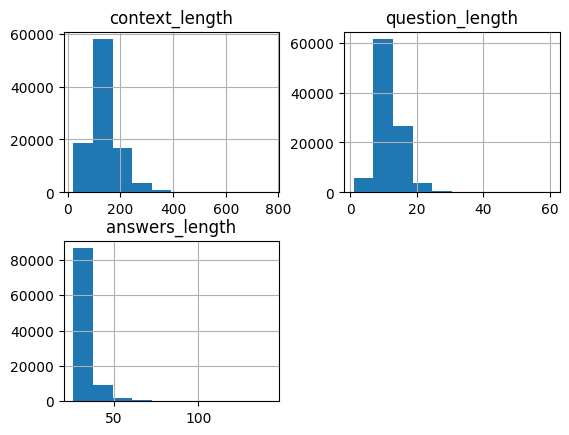

In [33]:
# Visualization
data[['context_length', 'question_length', 'answers_length']].hist()

# Similarity matching

In [34]:
# loading libraries
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
sw = stopwords.words('english') 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [35]:
# selecting the subset of data
sample_data = datasets["train"][30]
# sentence tokenize
sentences = nltk.sent_tokenize(sample_data['context'])
print(sample_data['question'])
print(sample_data['answers'])

for i in range (len(sentences)):
  print(i," - ", sentences[i])



What is the title of Notre Dame's Theodore Hesburgh?
{'text': ['President Emeritus of the University of Notre Dame'], 'answer_start': [466]}
0  -  The Joan B. Kroc Institute for International Peace Studies at the University of Notre Dame is dedicated to research, education and outreach on the causes of violent conflict and the conditions for sustainable peace.
1  -  It offers PhD, Master's, and undergraduate degrees in peace studies.
2  -  It was founded in 1986 through the donations of Joan B. Kroc, the widow of McDonald's owner Ray Kroc.
3  -  The institute was inspired by the vision of the Rev.
4  -  Theodore M. Hesburgh CSC, President Emeritus of the University of Notre Dame.
5  -  The institute has contributed to international policy discussions about peace building practices.


In [36]:
# Identifying the sentence number in which answer is present
idx = sample_data['answers']['answer_start'][0]
total_len = 0
i = 0
while (i < len(sentences)):
  total_len += len(sentences[i])
  i+=1
  if total_len > idx:
    break
  
print("Found in sentence - ", i-1)



Found in sentence -  4


In [37]:
import pandas as pd
df = pd.DataFrame(columns= ['data_idx', 'answer_sentence_idx', 'similarity_idx', 'answer_sentence', 'predicted_sentence'])
for j in range(10000):
  sample_data = datasets["train"][j]
  # sentence tokenize of context
  sentences = nltk.sent_tokenize(sample_data['context'])
  #index of first answer in answers list
  idx = sample_data['answers']['answer_start'][0]
  total_len = 0
  n = 0
  # check through sentences to find answer is in which sentence
  while (n < len(sentences)):
    total_len += len(sentences[n])
    n+=1
    if total_len > idx:
      break

  # calculating similarity
  max_similarity = 0
  max_sim_idx = 0
  # word tokenize the question
  Y_list = word_tokenize(sample_data['question'])

  for idx, each in enumerate(sentences):
    # word tokenize the context
    X_list = word_tokenize(each) 
    l1 =[];l2 =[]
    # stopword filtering
    X_set = {w for w in X_list if not w in sw} 
    Y_set = {w for w in Y_list if not w in sw}
      
    # form a set containing keywords of both strings 
    rvector = X_set.union(Y_set) 
    for w in rvector:
        if w in X_set: l1.append(1) # create a vector
        else: l1.append(0)
        if w in Y_set: l2.append(1)
        else: l2.append(0)
    c = 0
      
    # cosine formula 
    for i in range(len(rvector)):
            c+= l1[i]*l2[i]
    cosine = c / float((sum(l1)*sum(l2))**0.5)
    if cosine > max_similarity:
      max_similarity = cosine
      max_sim_idx = idx

  df.loc[j] = (j,n-1, max_sim_idx, sentences[n-1], sentences[max_sim_idx])
    
  

In [38]:
# For 1000 samples
# No of sentences where the sentence of original answer and high similarity sentences are same
len(df[df['answer_sentence_idx'] == df['similarity_idx']])

7348

In [39]:
df

,data_idx,answer_sentence_idx,similarity_idx,answer_sentence,predicted_sentence
0,0,5,5,"It is a replica of the grotto at Lourdes, Fran...","It is a replica of the grotto at Lourdes, Fran..."
1,1,2,3,Immediately in front of the Main Building and ...,Next to the Main Building is the Basilica of t...
2,2,3,3,Next to the Main Building is the Basilica of t...,Next to the Main Building is the Basilica of t...
3,3,4,4,"Immediately behind the basilica is the Grotto,...","Immediately behind the basilica is the Grotto,..."
4,4,1,3,Atop the Main Building's gold dome is a golden...,Next to the Main Building is the Basilica of t...
...,...,...,...,...,...
9995,9995,0,0,Institutes of technology with different origin...,Institutes of technology with different origin...
9996,9996,1,1,Suranaree University of Technology is the only...,Suranaree University of Technology is the only...
9997,9997,1,1,Suranaree University of Technology is the only...,Suranaree University of Technology is the only...
9998,9998,1,1,Suranaree University of Technology is the only...,Suranaree University of Technology is the only...


##Inference

In [44]:
# correct detection
c = df[df['answer_sentence_idx'] == df['similarity_idx']].iloc[30]
x = int(c['data_idx'])
print("predicted: ", c['predicted_sentence'])
print()
print("original: ")
datasets["train"][x]

predicted:  Around 1899, Professor Jerome Green became the first American to send a wireless message.

original: 


{'id': '5733b1da4776f4190066106a',
 'title': 'University_of_Notre_Dame',
 'context': "In 1882, Albert Zahm (John Zahm's brother) built an early wind tunnel used to compare lift to drag of aeronautical models. Around 1899, Professor Jerome Green became the first American to send a wireless message. In 1931, Father Julius Nieuwland performed early work on basic reactions that was used to create neoprene. Study of nuclear physics at the university began with the building of a nuclear accelerator in 1936, and continues now partly through a partnership in the Joint Institute for Nuclear Astrophysics.",
 'question': 'In what year did Jerome Green send his first wireless message?',
 'answers': {'text': ['Around 1899'], 'answer_start': [123]}}

In [45]:
# incorrect detection
c = df[df['answer_sentence_idx'] != df['similarity_idx']].iloc[45]
x = int(c['data_idx'])
print(c['predicted_sentence'])
datasets["train"][x]

The most remarkable episode of violence was the clash between Notre Dame students and the Ku Klux Klan in 1924.


{'id': '573388ce4776f41900660cc5',
 'title': 'University_of_Notre_Dame',
 'context': "The success of its football team made Notre Dame a household name. The success of Note Dame reflected rising status of Irish Americans and Catholics in the 1920s. Catholics rallied up around the team and listen to the games on the radio, especially when it knocked off the schools that symbolized the Protestant establishment in America — Harvard, Yale, Princeton, and Army. Yet this role as high-profile flagship institution of Catholicism made it an easy target of anti-Catholicism. The most remarkable episode of violence was the clash between Notre Dame students and the Ku Klux Klan in 1924. Nativism and anti-Catholicism, especially when directed towards immigrants, were cornerstones of the KKK's rhetoric, and Notre Dame was seen as a symbol of the threat posed by the Catholic Church. The Klan decided to have a week-long Klavern in South Bend. Clashes with the student body started on March 17, when stud

##Find Entities

In [66]:
def find_entities(question_type, answer_sentences):
  print("Question type:", question_type)
  # for each sentence identify the related entities
  for sent in answer_sentences:
    doc = nlp(sent)
    if question_type == "Who":
      for ent in nlp(sent).ents:
          print(ent.text, ent.label_)
          if ent.label_ == 'PERSON':
            return ent.text, sent
    if question_type == "When":
      for ent in nlp(sent).ents:
          print(ent.text, ent.label_)
          if ent.label_ in ['DATE', 'TIME']:
            return ent.text, sent
    if question_type == "Where":
      for ent in nlp(sent).ents:
          print(ent.text, ent.label_)
          if ent.label_ in ['GPE','LOC', 'FAC']:
            return ent.text, sent

  return None, None

In [68]:
# identity the entities in the context
for j in range(10000):
  x  = datasets["train"][j]['question'].lower()
  # sentence tokenize
  sentences = nltk.sent_tokenize(datasets["train"][j]['context'])
  flag =0
  # indetifying the question type
  for each in ["who", "when", "where"]:
    if each in x:
      flag = 1
      break
  if flag:
    find_entities(each.capitalize(), sentences)
    break

  

Question type: Who
Catholic NORP
the Main Building's FAC
the Virgin Mary FAC
the Main Building FAC
Venite Ad Me Omnes WORK_OF_ART
the Main Building FAC
the Sacred Heart FAC
Grotto ORG
Marian GPE
Lourdes GPE
France GPE
the Virgin Mary FAC
Saint Bernadette Soubirous PERSON
